<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_02_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyの読み込み
import imutils # 画像処理ユーティリティパッケージimutilsの読み込み
import cv2 # 画像処理パッケージopencvの読み込み
import matplotlib.pyplot as plt # 描画パッケージmatplotlibの読み込み

# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks//画像処理/"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/画像処理


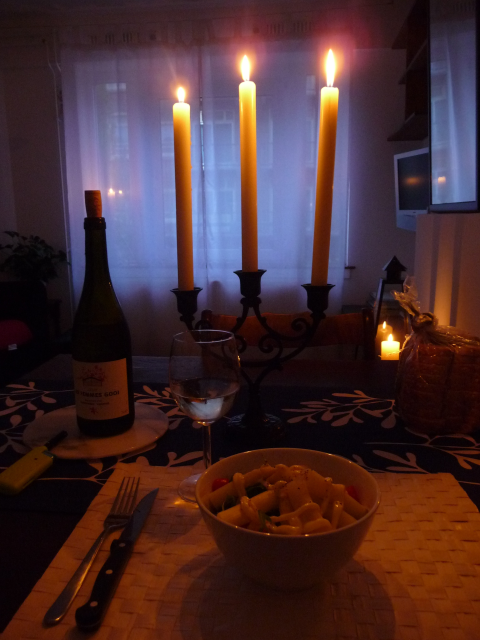

In [ ]:
### 1-1: 画像の読込と表示（このセルの中身は触らなくて良い）
img = imutils.url_to_image('https://bit.ly/3H7Hnq7')

# 読み込めなかった場合の例外処理
if img is None:
  print('Image file not found.')

# 画像の表示
cv2_imshow(img)

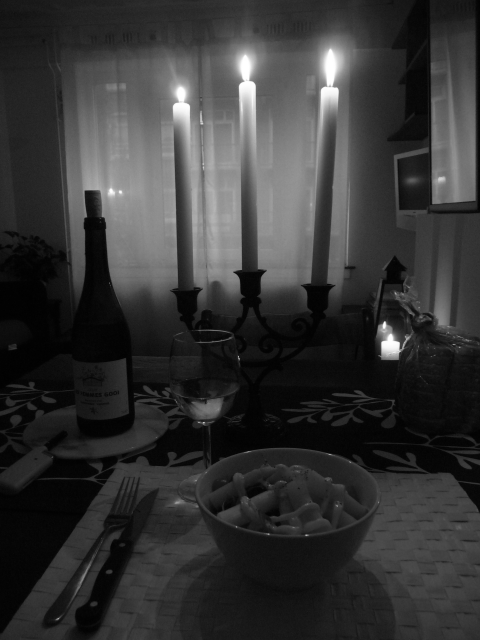

In [ ]:
### 1-2: 色空間の変換，画像の書き出し（このセルの中身は触らなくて良い）
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 画像の表示
cv2_imshow(gray_img)

Blue channel


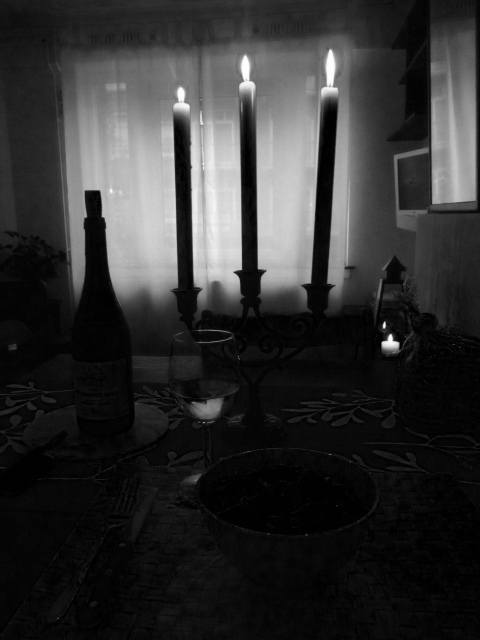

Green channel


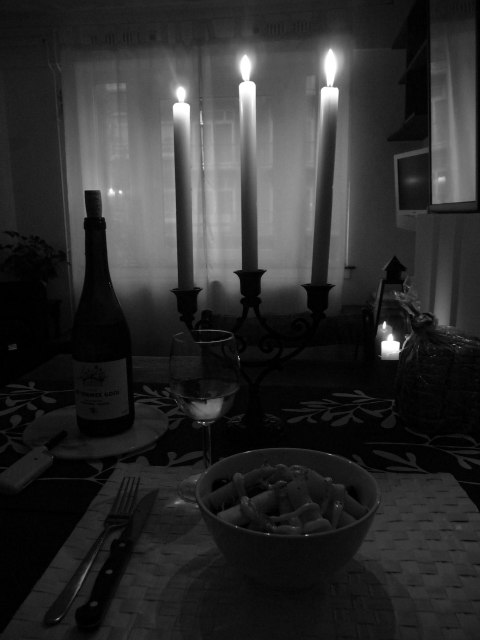

Red channel


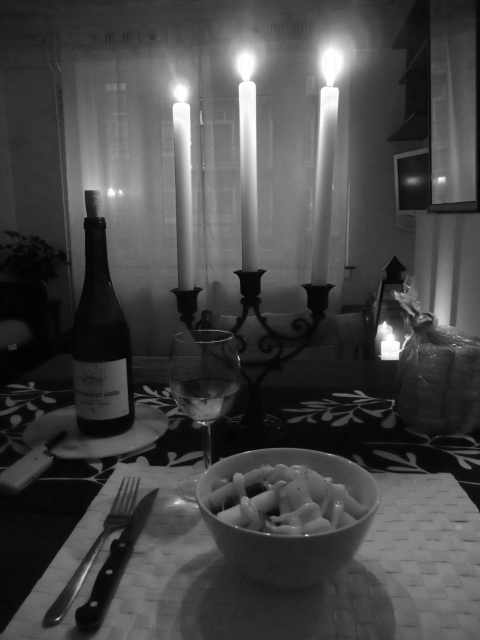

In [ ]:
### 1-3a: RGBチャネルの分割（このセルの中身は触らなくて良い）

# 分割結果はBGRの順にチャネルに分かれている
(blue_img, green_img, red_img) = cv2.split(img)

print("Blue channel")
cv2_imshow(blue_img)
print("Green channel")
cv2_imshow(green_img)
print("Red channel")
cv2_imshow(red_img)

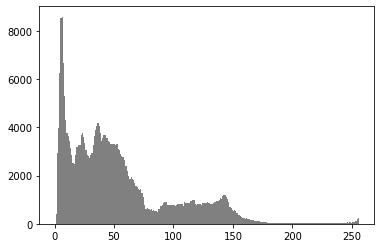

[     0    388   3325   7316  13576  22142  30742  37408  42713  47008
  50773  54423  57848  61004  63859  66377  68842  71684  74861  78063
  81332  84607  88276  92033  95651  98986 102069 104942 107754 110492
 113340 116280 119540 123181 127075 131121 135307 139350 143130 146587
 150140 153816 157491 161035 164617 168053 171462 174780 178107 181403
 184724 188011 191332 194449 197523 200411 203214 205979 208617 211026
 213414 215592 217562 219443 221389 223234 225060 226750 228340 229885
 231318 232715 234142 235401 236503 237266 237899 238506 239153 239757
 240322 240916 241458 242028 242578 243120 243622 244216 244845 245583
 246380 247252 248152 249060 249956 250741 251506 252289 253056 253843
 254640 255394 256168 256992 257824 258667 259482 260290 261042 261930
 262807 263662 264532 265410 266347 267285 268266 269246 270076 270855
 271675 272478 273316 274116 274961 275823 276703 277581 278466 279338
 280212 281029 281860 282713 283601 284500 285463 286412 287393 288462
 28950

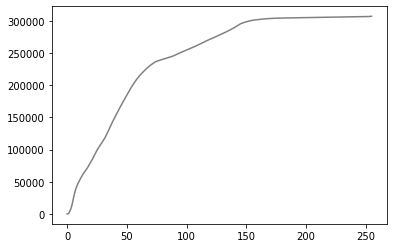

In [ ]:
### 2-1 濃淡ヒストグラムの描画（このセルの中身は触らなくて良い）

# ヒストグラム
hist, bins = np.histogram(gray_img.flatten(), bins=256, range=[0,256])
plt.hist(gray_img.flatten(), bins=256, range=[0,256], color="gray")
plt.show()

# 累積ヒストグラム
cum_hist = hist.cumsum() 
print(cum_hist)
plt.plot(cum_hist, color="gray")
plt.show()

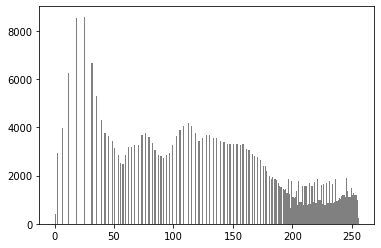

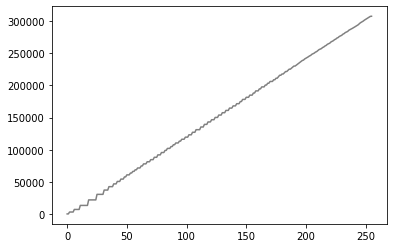

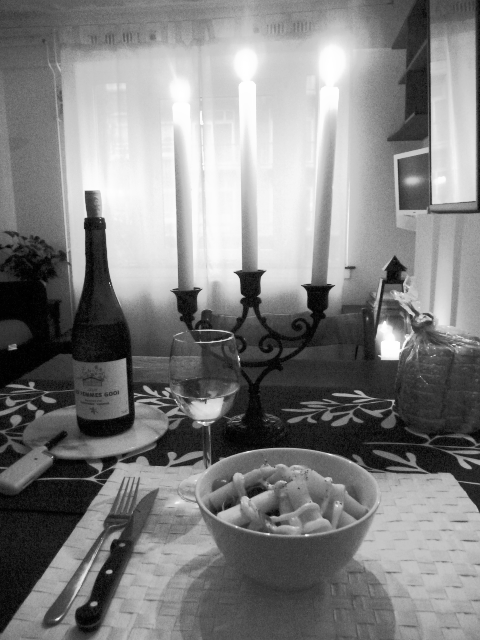

In [ ]:
cum_hist_func = 255 * cum_hist / np.max(cum_hist)

# 課題2-1a：濃淡階調変換
rows, cols = gray_img.shape # 画像の大きさを取得
trans_gray_img = np.zeros((rows, cols), np.uint8) # 変換結果を記録する黒い画像を用意


# ラスタ走査して画素毎に変換
for x in range(0, rows):
  for y in range(0, cols):
    trans_gray_img[x,y] = cum_hist_func[gray_img[x,y]]



# ヒストグラム
hist, bins = np.histogram(trans_gray_img.flatten(), bins=256, range=[0,256])
plt.hist(trans_gray_img.flatten(), bins=256, range=[0,256], color="gray")
plt.show()

# 累積ヒストグラム
cum_hist = hist.cumsum() 
plt.plot(cum_hist, color="gray")
plt.show()

cv2_imshow(trans_gray_img)

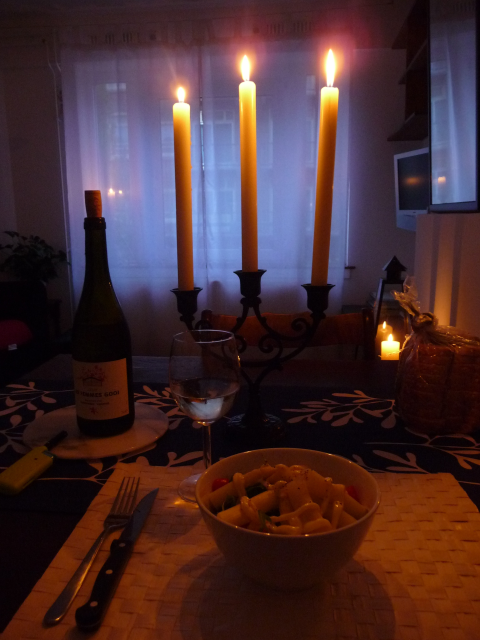

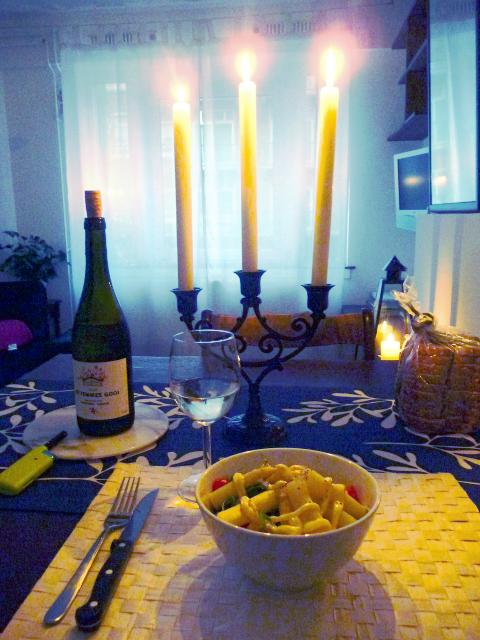

In [ ]:
# 課題2-1b：カラー画像への適用

rows, cols = gray_img.shape # 画像の大きさを取得

trans_channels = []

# ラスタ走査して画素毎に変換
for channel in (blue_img, green_img, red_img):
  trans_channel = np.zeros((rows, cols), np.uint8) # 変換結果を記録する黒い画像を用意
  
  # 累積ヒストグラムによる変換用
  hist, bins = np.histogram(channel.flatten(), bins=256, range=[0,256])  
  cum_hist = hist.cumsum() 
  cum_hist_func = 255 * cum_hist / np.max(cum_hist)




  for x in range(0, rows):
    for y in range(0, cols):
      trans_channel[x,y] = cum_hist_func[channel[x,y]]
  trans_channels.append(trans_channel)

img2BGR = cv2.merge(trans_channels)
cv2_imshow(img) 
cv2_imshow(img2BGR)

n= 1


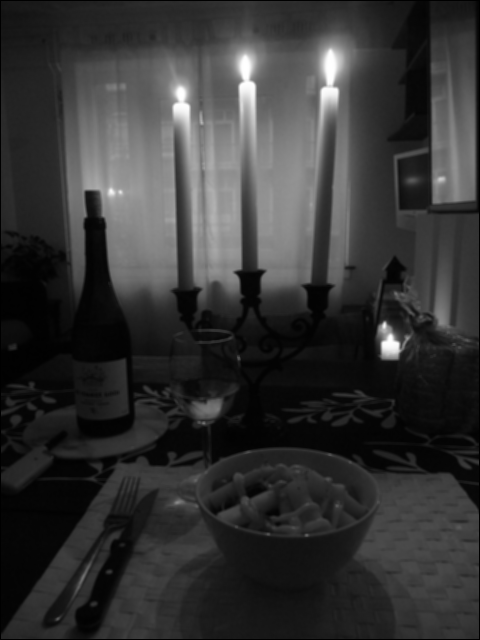

n= 3


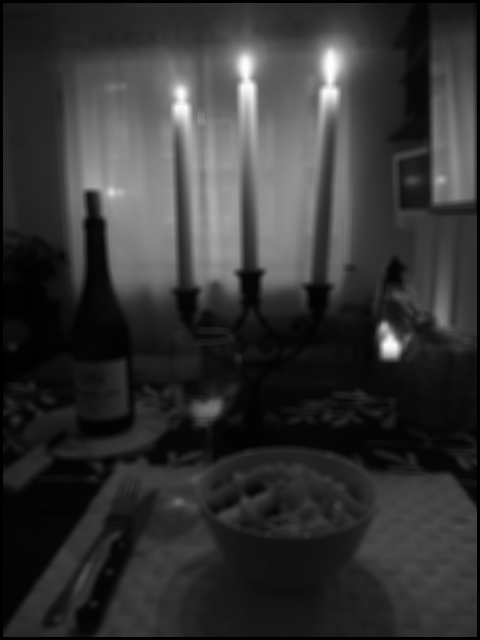

n= 50


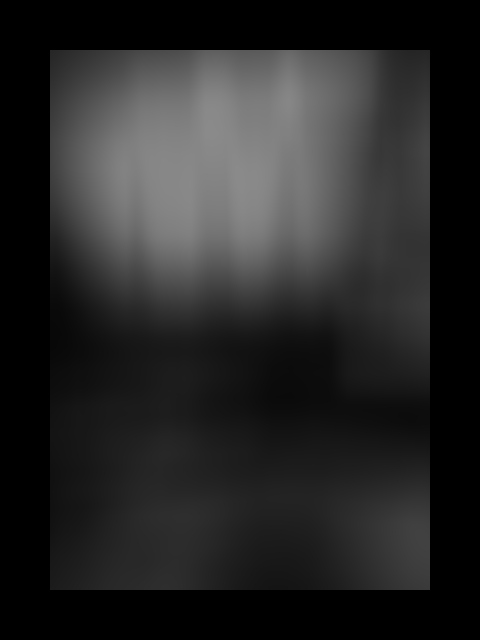

In [ ]:
# 課題2-2：平滑化
rows, cols = gray_img.shape # 画像の大きさを取得

for n in [1,3,50]:
  print("n=", n)
  filterd_img = np.zeros((rows, cols), np.uint8) # 変換結果を記録する黒い画像を用意
  for x in range(n, rows-n):
    for y in range(n, cols-n):
      filterd_img[x,y] = np.mean(gray_img[x-n:x+n+1, y-n:y+n+1].flatten())

  cv2_imshow(filterd_img)